In [0]:
import numpy as np

In [3]:
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [0]:
from numpy import ogrid

In [7]:
ogrid[-10:10:10j] #j to see how many elements present in array

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

In [9]:
p=np.poly1d([1,2,3])
print(p)

   2
1 x + 2 x + 3


In [11]:
p(5)

38

In [14]:
print(p.c)
p.c

[1 2 3]


array([1, 2, 3])

In [15]:
p.order

2

In [16]:
p[1]

2

In [26]:
q=np.poly1d([1,4,10,20,35,44,46,40,25])
print(q)
q(1) #subsitute x=1 and calculate 

   8     7      6      5      4      3      2
1 x + 4 x + 10 x + 20 x + 35 x + 44 x + 46 x + 40 x + 25


225

q.order

[link text](https://)p=np.square(p)
print(p)

In [32]:
q= q*q
print(q)

   16     15      14       13       12       11        10        9
1 x  + 8 x  + 36 x  + 120 x  + 330 x  + 768 x  + 1544 x  + 2728 x
         8        7        6        5        4        3        2
 + 4275 x + 5920 x + 7256 x + 7848 x + 7386 x + 5880 x + 3900 x + 2000 x + 625


In [39]:
q.order
q[15]
#q[0].dtype

8

In [40]:
np.poly1d([1,-1])* np.poly1d([1,-2])

poly1d([ 1, -3,  2])

In [0]:
def addsubtract(a,b):
  if a > b:
    return a - b
  else:
    return a + b

In [47]:
vec_addsubtract = np.vectorize(addsubtract)
vec_out= vec_addsubtract([1,2,3,4],2)
type(vec_out)


numpy.ndarray

In [0]:
def mypolyval(p, x):
    _p = list(p)
    res = _p.pop(0)
    while _p:
        res = res*x + _p.pop(0)
    return res


In [51]:
vpolyval = np.vectorize(mypolyval, excluded=['p']) ##excluded means 
vpolyval(p=[1, 2, 3], x=[0, 1])

array([3, 6])

In [0]:
import scipy.integrate as integrate
import scipy.special as special


In [53]:
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

(1.1178179380783253, 7.866317182537226e-09)

In [0]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

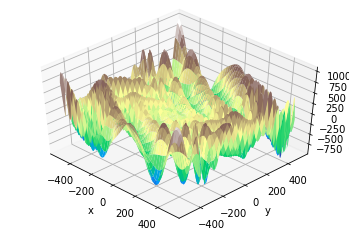

In [57]:
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [58]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515605128
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 2
   nlfev: 50
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097806, 453.97741934])
      xl: array([[439.48097806, 453.97741934]])

In [59]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

     fun: -956.9182315924427
 message: ['Maximum number of iteration reached']
    nfev: 4163
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([482.35371784, 432.87941092])